In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_df = load_boston()

/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [4]:
boston_df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
#Description of the dataset

print(boston_df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(boston_df.data,columns=boston_df.feature_names)

In [7]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
df.shape

(506, 13)

### Prepare the dataset

In [9]:
df["Price"] = boston_df.target

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
#Rename the columns for better understanding

df.rename(columns = {'CRIM':'Crime_Rate','ZN':'Land_Zone','INDUS':'Non_Ret_Bus','CHAS':'Charles_Riv_DM','RAD':'Radial_Highways','B':'Prop_Blk_People'}, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crime_Rate       506 non-null    float64
 1   Land_Zone        506 non-null    float64
 2   Non_Ret_Bus      506 non-null    float64
 3   Charles_Riv_DM   506 non-null    float64
 4   NOX              506 non-null    float64
 5   RM               506 non-null    float64
 6   AGE              506 non-null    float64
 7   DIS              506 non-null    float64
 8   Radial_Highways  506 non-null    float64
 9   TAX              506 non-null    float64
 10  PTRATIO          506 non-null    float64
 11  Prop_Blk_People  506 non-null    float64
 12  LSTAT            506 non-null    float64
 13  Price            506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
df.isnull().sum()

Crime_Rate         0
Land_Zone          0
Non_Ret_Bus        0
Charles_Riv_DM     0
NOX                0
RM                 0
AGE                0
DIS                0
Radial_Highways    0
TAX                0
PTRATIO            0
Prop_Blk_People    0
LSTAT              0
Price              0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crime_Rate,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
Land_Zone,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
Non_Ret_Bus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
Charles_Riv_DM,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
Radial_Highways,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [15]:
#Check Missing values

df.isnull().sum()

Crime_Rate         0
Land_Zone          0
Non_Ret_Bus        0
Charles_Riv_DM     0
NOX                0
RM                 0
AGE                0
DIS                0
Radial_Highways    0
TAX                0
PTRATIO            0
Prop_Blk_People    0
LSTAT              0
Price              0
dtype: int64

### EDA

1. Coorelation

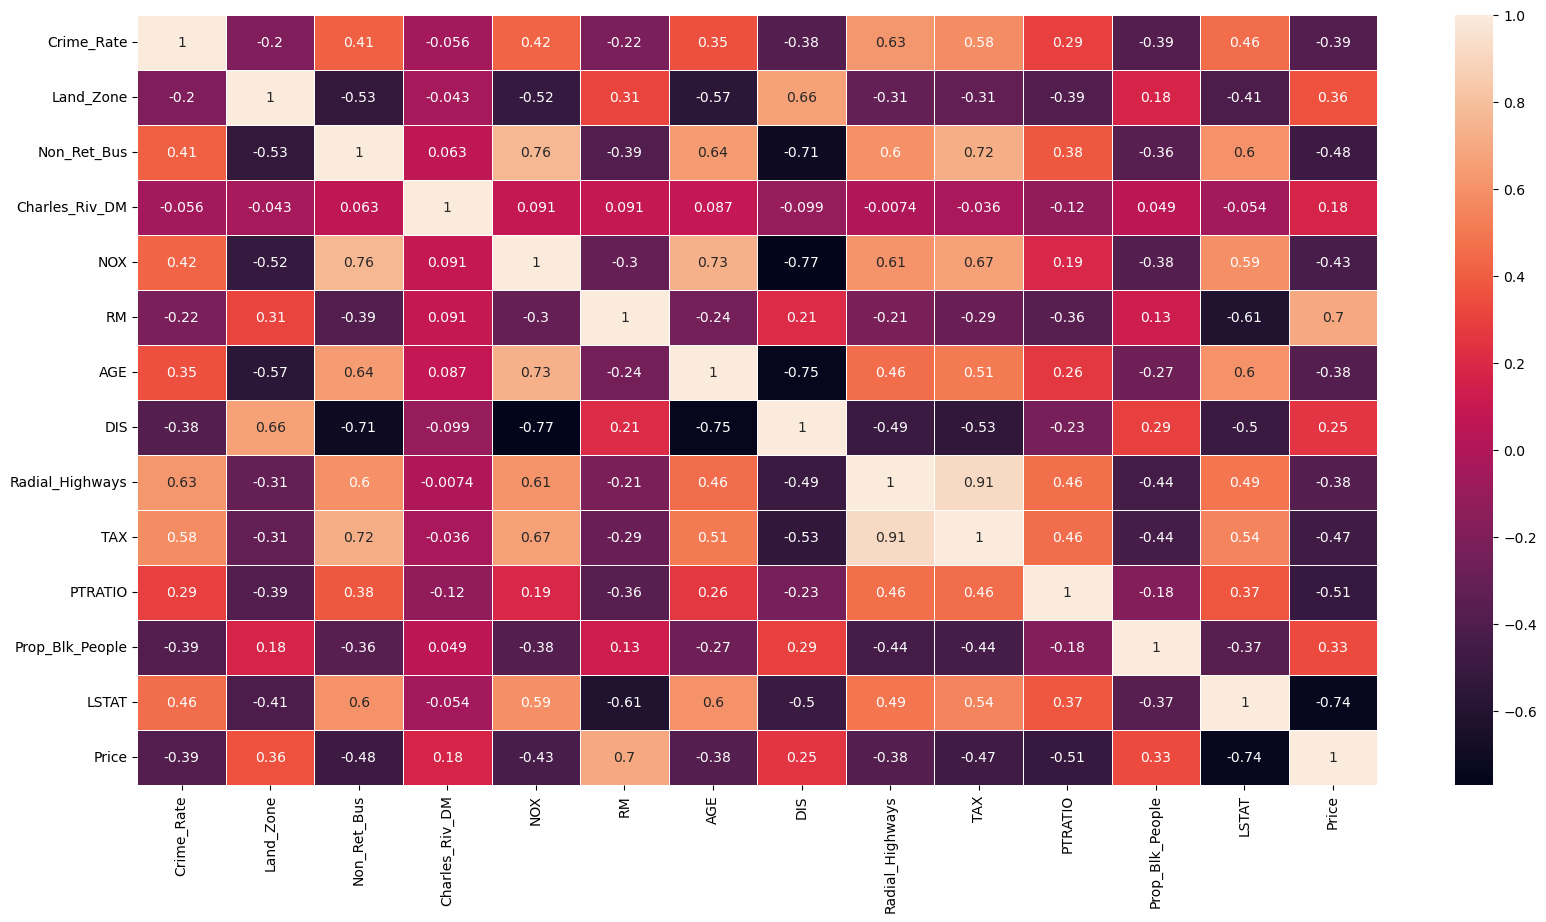

In [16]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(),annot=True,linewidths=0.5,ax=ax)
plt.show()

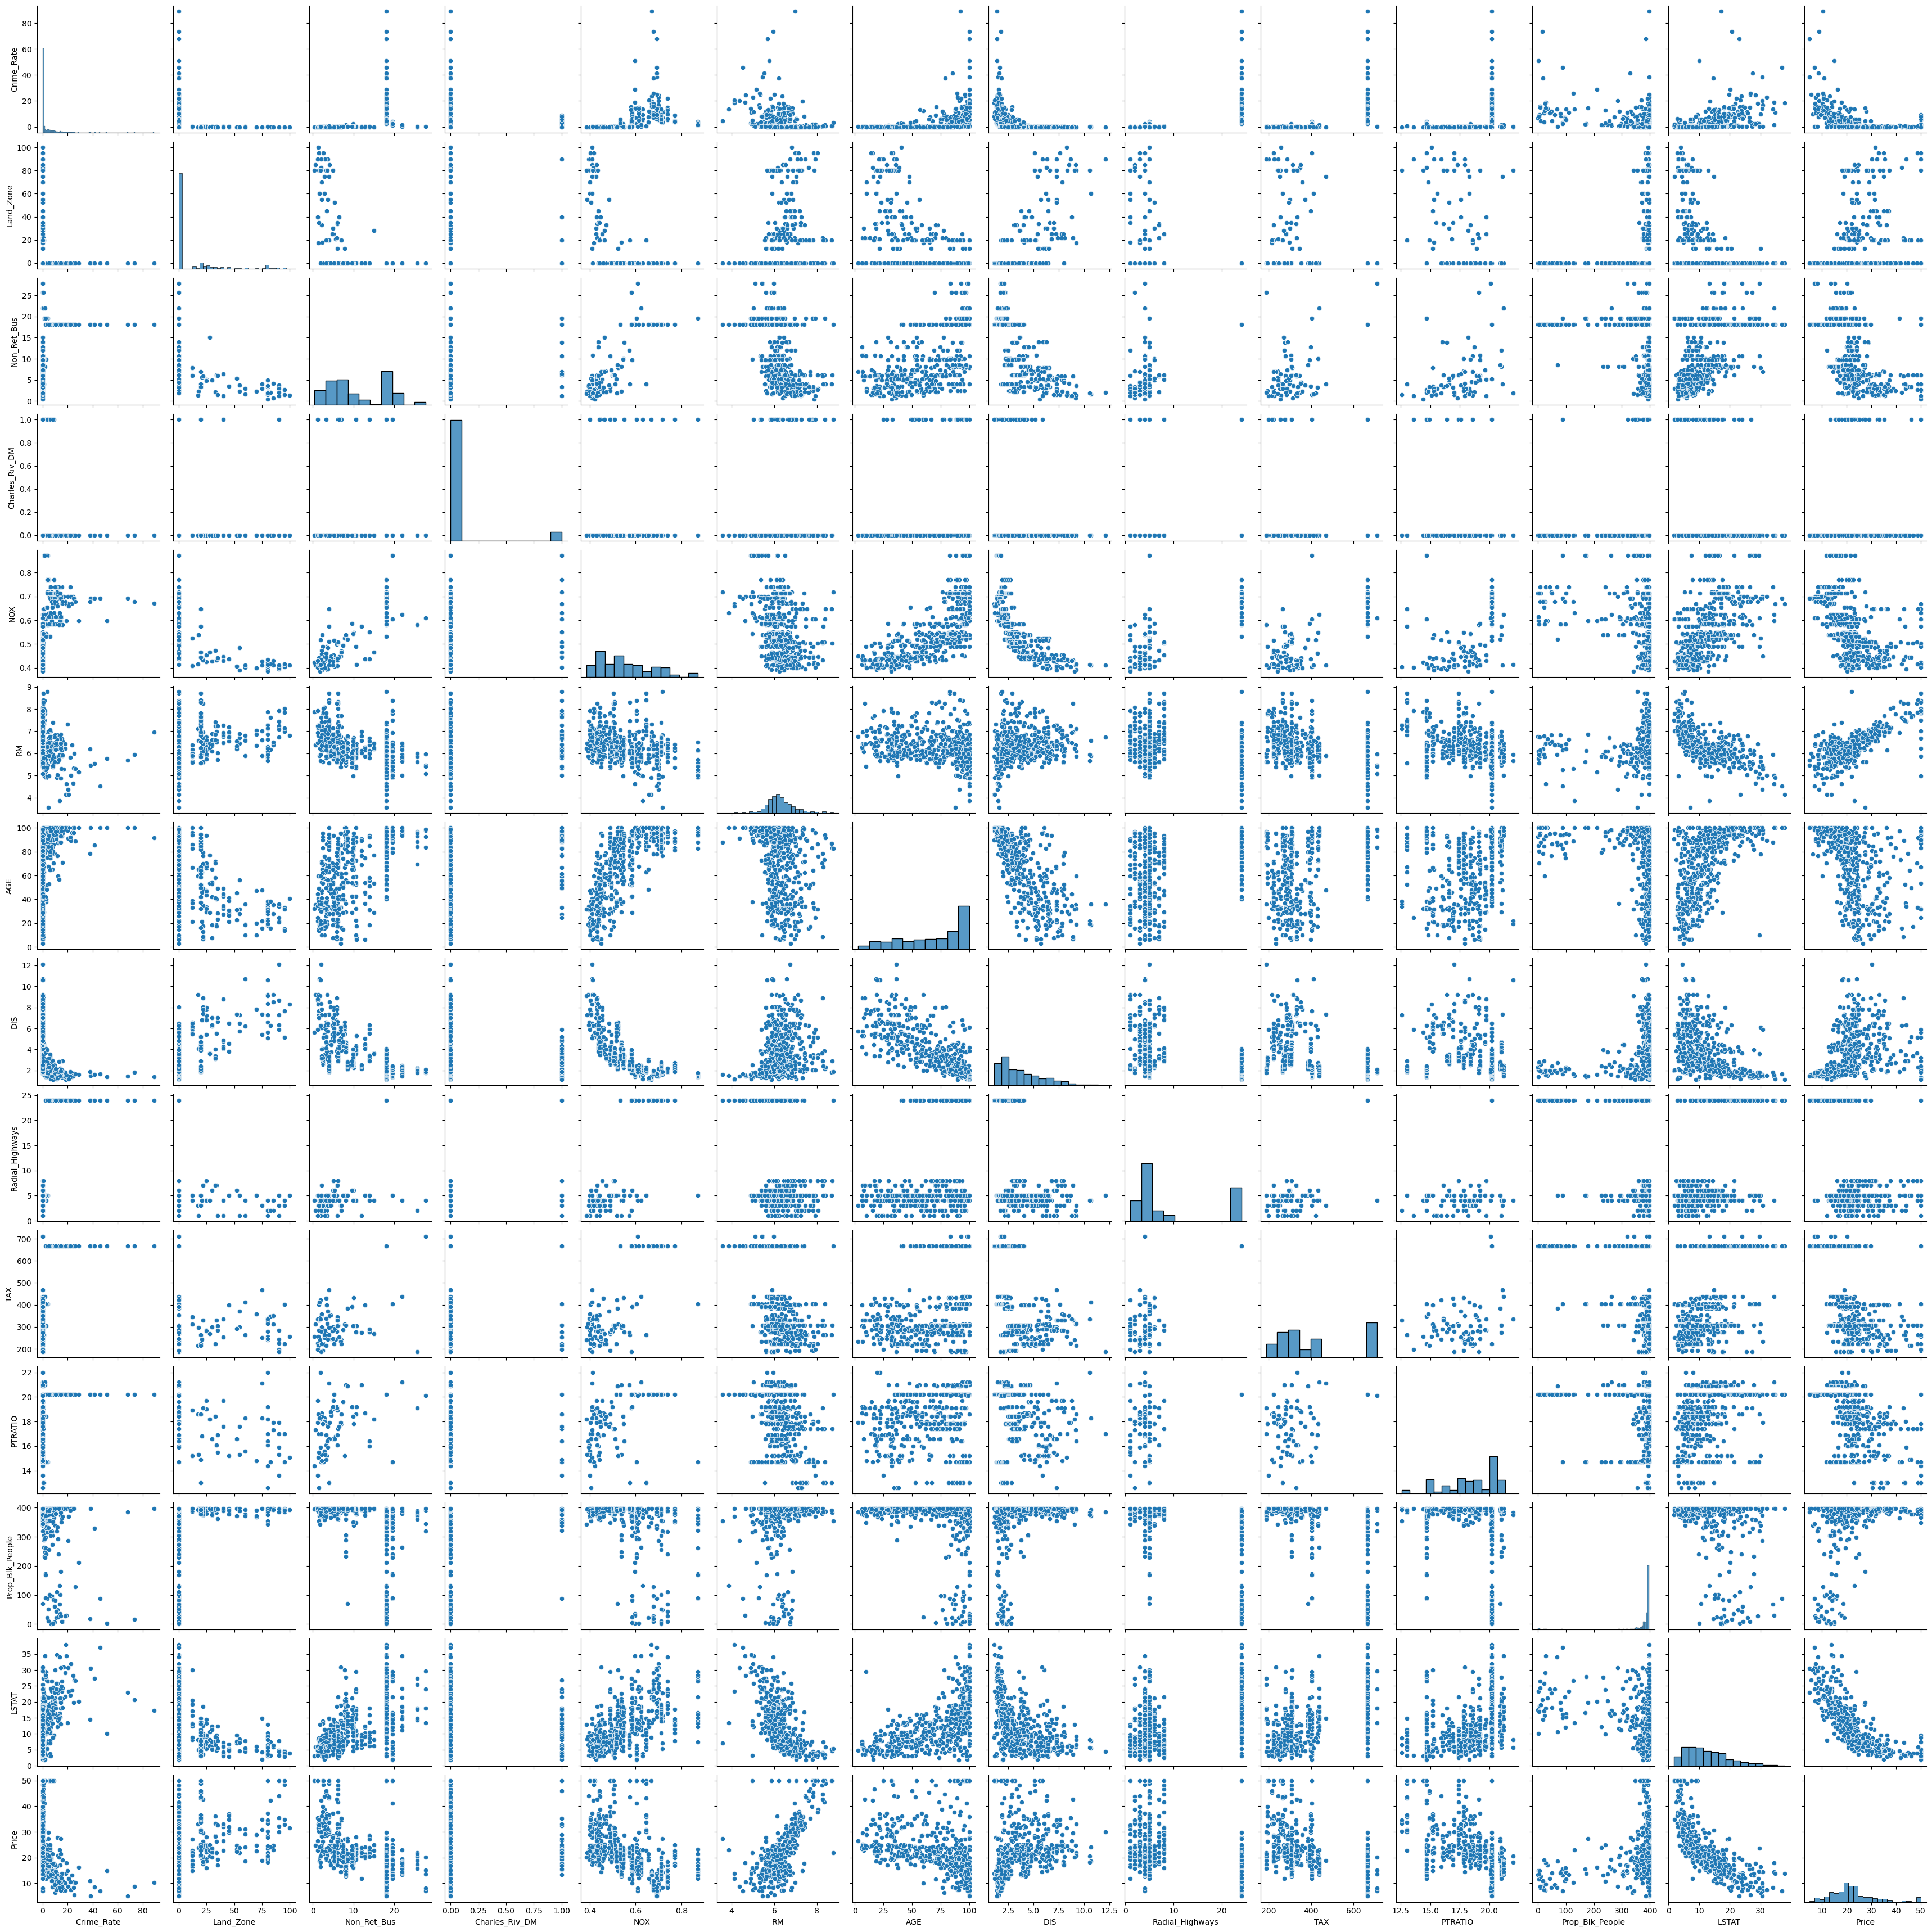

In [17]:
sns.pairplot(df)

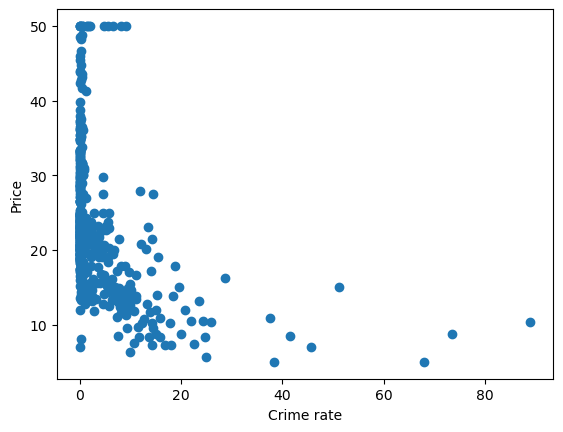

In [18]:
plt.scatter(x = df['Crime_Rate'],y = df['Price'])
plt.xlabel('Crime rate')
plt.ylabel('Price')
plt.show()

So Crime rate and Price is inversely related and that is so obvious.

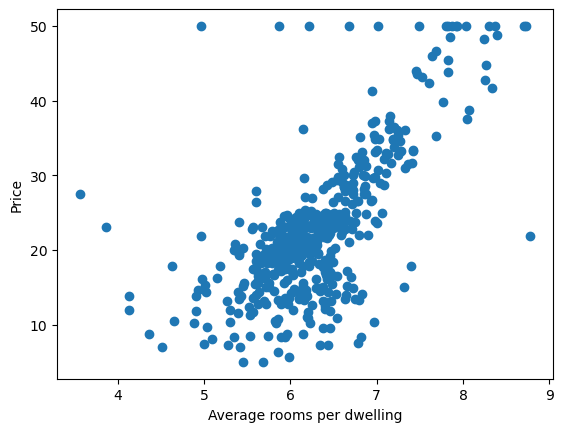

In [19]:
plt.scatter(x = df['RM'],y = df['Price'])
plt.xlabel('Average rooms per dwelling')
plt.ylabel('Price')
plt.show()

<AxesSubplot:xlabel='RM', ylabel='Price'>

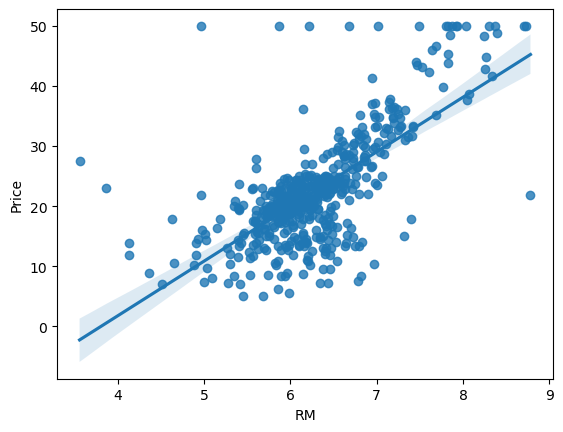

In [20]:
sns.regplot(x = df['RM'],y = df['Price'])

A positive cooorelation between Price and average rooms per dwelling. And it is justified by the above two plots.

Text(0.5, 0, '% Lower status of the population')

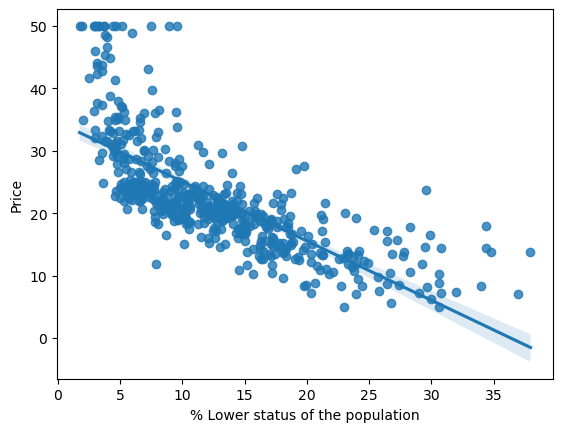

In [21]:
sns.regplot(x = df['LSTAT'],y = df['Price'])
plt.xlabel('% Lower status of the population')

Lower status of the population and Price is negatively coorelated

Text(0, 0.5, 'Proportion of black people')

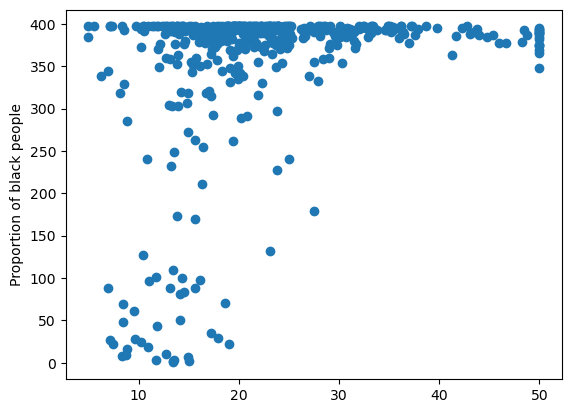

In [22]:
plt.scatter(x = df['Price'],y = df['Prop_Blk_People'])
plt.ylabel('Proportion of black people')

Black population is concentrated to a particular price range



Text(0.5, 0, 'Pupil to Tutor Ratio')

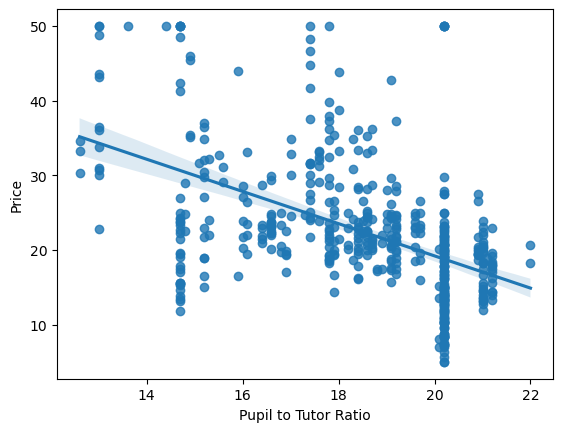

In [23]:
sns.regplot(x = df['PTRATIO'],y = df['Price'])
plt.xlabel('Pupil to Tutor Ratio')

As PT-Ratio increases price decreases. So inversely related

### Train the Model

In [24]:
X = df.iloc[:,:-1]
y= df['Price']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(354, 13) (152, 13)
(354,) (152,)


In [27]:
#Standardize the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)

In [29]:
X_test = sc.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
#Print coefficients and intercepts

print(lr.coef_)
print('\n')
print(lr.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


23.01581920903955


In [33]:
#On which parameter this model has been trained

lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [34]:
#Prediction with test data

y_pred = lr.predict(X_test)

In [35]:
y_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

/Users/avi/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Price'>

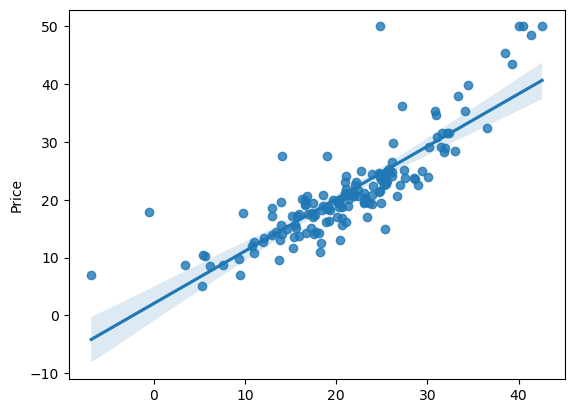

In [36]:
# A scatter plot for prediction

#plt.scatter(y_pred,y_test)
sns.regplot(y_pred,y_test)

In [37]:
#Residuals

res = y_test - y_pred

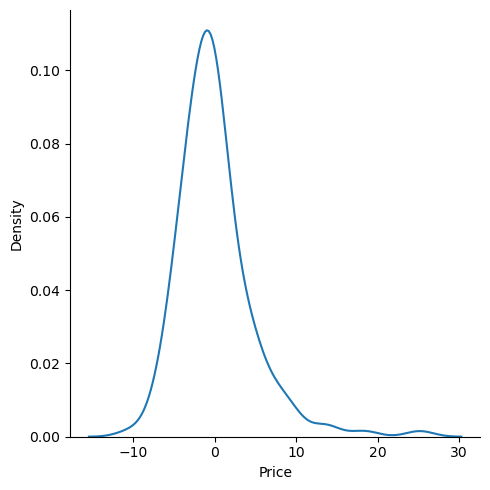

In [38]:
sns.displot(res,kind='kde')

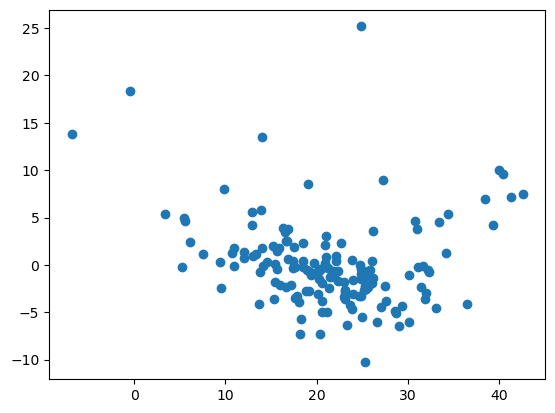

In [39]:
#Scatter plot with respect to prediction and residuals

plt.scatter(y_pred,res)

### Performance Metrics

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE: 3.162709871457406
MSE: 21.517444231177205
R2 Score: 0.7112260057484933
RMSE: 4.6386899261728205


<b>R-Square</b>


You can use R-squared to:

1. Evaluate the overall fit of your model: A higher R-squared value indicates that your model is better at explaining the variability in the data.
2. Compare different models: You can compare R-squared values of different models to determine which one better explains the variability in the data.
3. Determine if additional features improve the model: Adding more features to the model may increase R-squared, which can help you decide if those features are useful.


R-squared can be thought of as a percentage: if you have an R-squared of 0.80 (or 80%), it means that your model can explain 80% of the variability in the target variable, while the remaining 20% of the variability is unexplained.

<b>Adjusted R-Square</b>

How to interpret adjusted R-squared:

Adjusted R-squared ranges from 0 to 1, similar to R-squared. However, unlike R-squared, adjusted R-squared can sometimes be negative if the model performs worse than a simple average. Here's how to interpret the value:

1. A higher adjusted R-squared value indicates that the model is better at explaining the variability in the target variable, taking into account the number of predictors used.
2. If the adjusted R-squared value increases when adding a new predictor, it suggests that the additional predictor is useful for the model.
3. If the adjusted R-squared value decreases or stays the same when adding a new predictor, it implies that the added predictor doesn't contribute to the model's performance.

In [41]:
1 - (1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639311

# New Data Prediction

In [42]:
#Let's pick up a row from the dataset and try to predict
#Ensure you reshape it

boston_df.data[0].reshape(1,-1).shape

(1, 13)

In [43]:
#now standard the values

sc.transform(boston_df.data[0].reshape(1,-1))

/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [44]:
lr.predict(sc.transform(boston_df.data[0].reshape(1,-1)))

/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

### Pickle for Model Deployment

In [45]:
import pickle

In [47]:
pickle.dump(lr,open('LRBostonHousing.pkl','wb'))

In [48]:
pickled_model = pickle.load(open('LRBostonHousing.pkl','rb'))

In [49]:
pickled_model.predict(sc.transform(boston_df.data[0].reshape(1,-1)))

/Users/avi/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])